In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

What is Standardization?

transform our data to have zero mean and unit variance, for example using the equation below:

![alt text](http://3.bp.blogspot.com/_xqXlcaQiGRk/RpO4yR0oKtI/AAAAAAAAABM/7rUWCMwizus/s200/fig2.png)

Why we need to standardize our data?

Standardization assumes that your observations fit a Gaussian distribution (bell curve) with a well behaved mean and standard deviation. You can still standardize your data if this expectation is not met, but you may not get reliable results.

This includes algorithms like Support Vector Machines, Linear and Logistic Regression, and other algorithms that assume or have improved performance with Gaussian data.

Standardization requires that you know or are able to accurately estimate the mean and standard deviation of observable values. You may be able to estimate these values from your training data.

Let us load our data set, I will use HR dataset, can get from pandas/data

In [2]:
df = pd.read_csv('/home/huseinzol05/Desktop/Introduction-DataScience-Python/pandas/data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Now we see average_montly_hours is large value compared to other columns. Let's study histogram for this column

mean: 201.050336689 std deviation: 49.9414344626


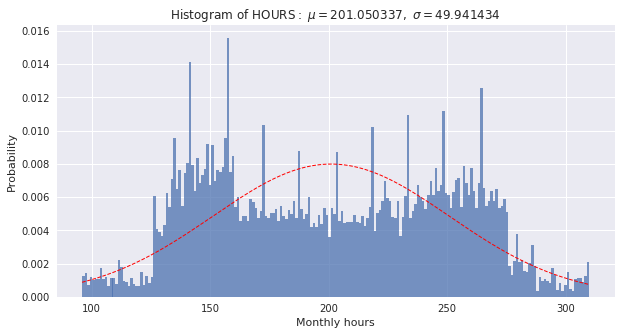

In [3]:
# change to numpy format using .values
average_montly_hours = df['average_montly_hours'].values
mean = average_montly_hours.mean()
std_deviation = average_montly_hours.std()
print('mean:', mean, 'std deviation:', std_deviation)
import matplotlib.mlab as mlab

fig = plt.figure(figsize = (10, 5))
n, bins, patches = plt.hist(average_montly_hours, 200, normed = 1, alpha = 0.75)
# get line
y = mlab.normpdf(bins, mean, std_deviation)
# draw our line
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Monthly hours')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ HOURS:}\ \mu=%f,\ \sigma=%f$' %(mean, std_deviation))
plt.grid(True)

plt.show()

See our X-axis, the value is huge. What happen if standardize the data? does the shape of our histogram will maintain?

mean: -8.71657199679e-17 std deviation: 1.0


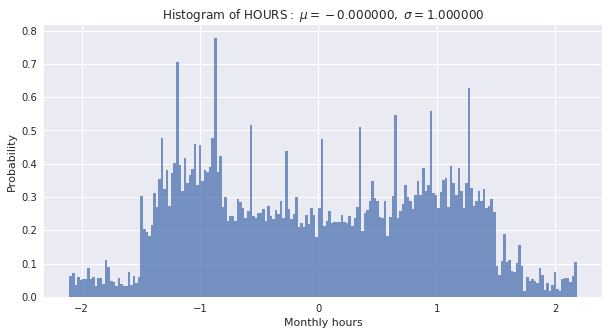

In [4]:
average_montly_hours_new = (average_montly_hours - mean) / (std_deviation * 1.0)
print('mean:', average_montly_hours_new.mean(), 'std deviation:', average_montly_hours_new.std())
fig = plt.figure(figsize = (10, 5))
n, bins, patches = plt.hist(average_montly_hours_new, 200, normed = 1, alpha = 0.75)
# get line
y = mlab.normpdf(bins, mean, std_deviation)
# draw our line
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Monthly hours')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ HOURS:}\ \mu=%f,\ \sigma=%f$' %(average_montly_hours_new.mean(), average_montly_hours_new.std()))
plt.grid(True)

plt.show()

It does maintain! plus our values become smaller now!

Now if we are lazy to calculate mean and standard deviation, there is library we can use

from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


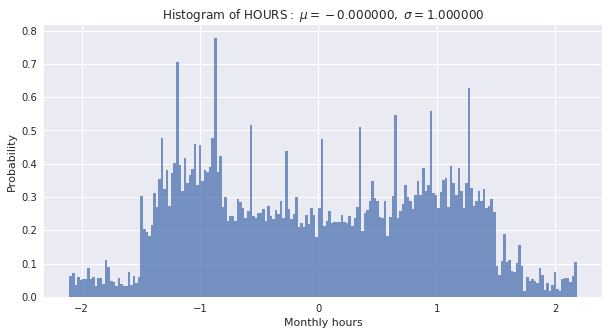

In [7]:
from sklearn.preprocessing import StandardScaler

average_montly_hours_new = StandardScaler().fit_transform(average_montly_hours.reshape([-1, 1]))
fig = plt.figure(figsize = (10, 5))
n, bins, patches = plt.hist(average_montly_hours_new[:, 0], 200, normed = 1, alpha = 0.75)
y = mlab.normpdf(bins, mean, std_deviation)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Monthly hours')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ HOURS:}\ \mu=%f,\ \sigma=%f$' %(average_montly_hours_new.mean(), average_montly_hours_new.std()))
plt.grid(True)

plt.show()

Tada! we still got same value!